# Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Importing Dataset

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


# Data pre-processing

In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


E:\program files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

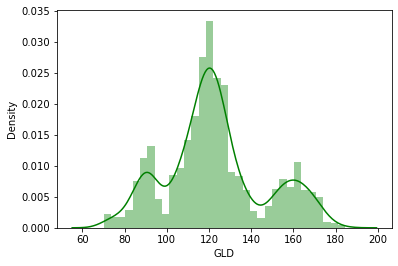

In [14]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

# Checking Correlation

In [11]:
correlation = gold_data.corr()

<AxesSubplot:>

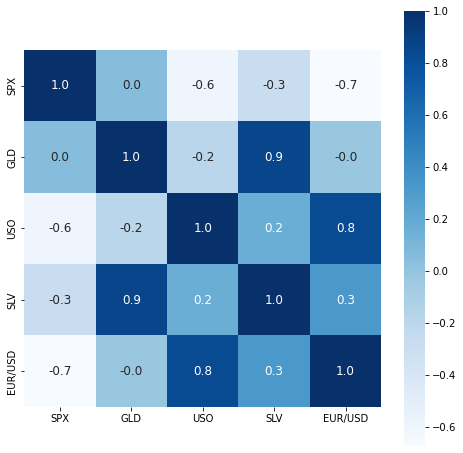

In [12]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 12}, cmap="Blues")

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Splitting the Features and Target

In [15]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Separating Train and Test Values

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Identifying the best Parameters

Text(0, 0.5, 'Testing Accuracy')

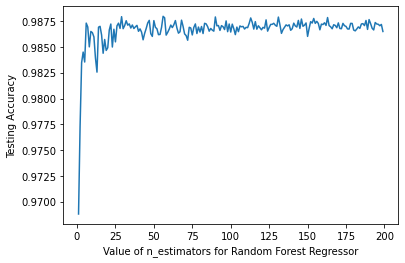

In [19]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestRegressor(n_estimators=k)
    rfc.fit(X_train, Y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.r2_score(Y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

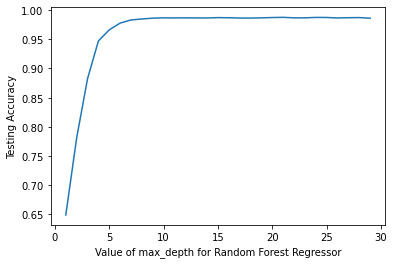

In [20]:
scores =[]
for k in range(1, 30):
    rfc = RandomForestRegressor(n_estimators=100, max_depth=k)
    rfc.fit(X_train, Y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.r2_score(Y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 30), scores)
plt.xlabel('Value of max_depth for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

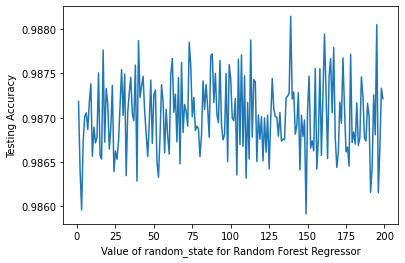

In [21]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestRegressor(n_estimators=100, random_state=k)
    rfc.fit(X_train, Y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.r2_score(Y_test, y_pred))
    
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of random_state for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

In [25]:
print(test_data_prediction)

[128.68256007  91.71337947 125.95569401 138.25331885 113.87964584
 124.70350613 127.13685152 120.09202687 115.4413228  120.46048494
 114.28404559 118.45396944 125.42937294 140.24931608 122.62244967
 125.51109978  89.30873222 119.40857486 108.97027745 159.95768409
  89.73714929 109.10601785 114.95902709 124.33669077  89.45911617
 150.77933459 114.90957664 168.50683157  81.57514645 163.78094866
  96.10332369  92.68525806 153.22928412 154.50144249  89.90244361
 119.42978361 122.73686741 102.8798967  105.72197347 144.10495169
 120.67630594 118.73491166 153.72878238 165.08638272 116.22202775
 120.67300195 161.65526809  90.59319128 166.44413876 127.41041066
 120.75495091  94.47703371  90.66978535 109.75344283 122.19032738
 155.40657242 121.34997852  84.04352485 110.73426393 157.76344527
 123.51748767 115.05716182 118.81865368 122.46136589 119.5478214
 108.76356137 154.51807337 124.7163795  121.41728228 120.57079161
  89.98472848 117.47452384 119.38452431 117.60644552 160.35659016
 109.601942

# Model Training and Evaluation

In [22]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, max_features="sqrt")

In [23]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt')

In [24]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [27]:
print("R squred error: ", error_score)

R squred error:  0.9879013894773592


# Comparing the Actual Values and Predicted Values in a Plot

In [28]:
Y_test = list(Y_test)

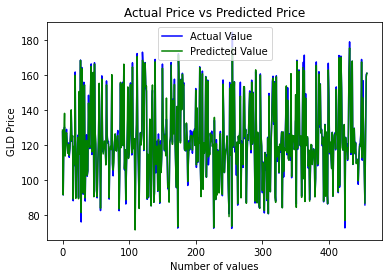

In [29]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel("GLD Price")
plt.legend()
plt.show()